In [2]:
from sklearn.model_selection import cross_val_score
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import confusion_matrix
import pylab as pl

from sklearn.metrics import precision_recall_fscore_support


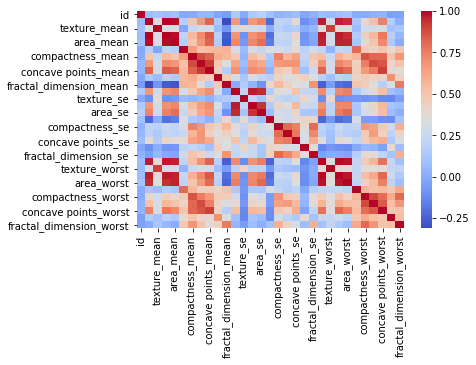

In [4]:
# Feature Selection using Correlation Analysis

data = pd.read_csv("BreastCancer_SOEN691.csv",header=0)
#data.head()

data.drop("Unnamed: 32",axis=1,inplace=True)
# Feature Selection
# Correlation Analysis

cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = data.corr()
sns.heatmap(correlations, cmap='coolwarm')
plt.show()

'''
corr = data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True, square = True,cmap= 'coolwarm')
plt.savefig("C:/Users/Deepak/Desktop/Masters Concordia/Winter 2019/Bigdata/Project/PPT screenshots/correlation.png") 

plt.show()
'''
correlations

# From correlation analysis we can select below attributes which are significant to predict dependant variable
prediction_var = ["radius_mean", "texture_mean", "area_mean", "compactness_mean", "concavity_mean", "symmetry_mean", "radius_se", "perimeter_se", "area_se", "compactness_se",  "concavity_se", "concave points_se", "texture_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "symmetry_worst", "fractal_dimension_worst"]

In [7]:
#prediction_var = ["radius_mean", "texture_mean", "area_mean", "compactness_mean", "concavity_mean", "symmetry_mean", "radius_se", "perimeter_se", "area_se", "compactness_se",  "concavity_se", "concave points_se", "texture_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "symmetry_worst", "fractal_dimension_worst"]

train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

train['diagnosis']=train['diagnosis'].map({'M':1,'B':0})
test['diagnosis']=test['diagnosis'].map({'M':1,'B':0})


x_train = train.loc[:, train.columns != 'diagnosis'] # Independant variable
y_train = train['diagnosis'] # Dependant variable

x_test = test.loc[:, test.columns != 'diagnosis']
y_test = test['diagnosis']
#x_train = x_train[prediction_var]
#x_test = x_test[prediction_var]



Text(0, 0.5, 'Accuracy')

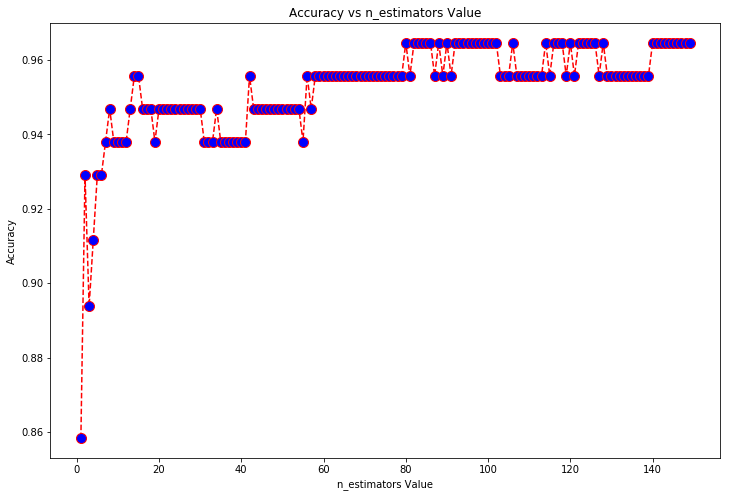

In [9]:
#To identify best n_estimators value


prediction_var = ["radius_mean", "texture_mean", "area_mean", "compactness_mean", "concavity_mean", "symmetry_mean", "radius_se", "perimeter_se", "area_se", "compactness_se",  "concavity_se", "concave points_se", "texture_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "symmetry_worst", "fractal_dimension_worst"]
x_train = x_train[prediction_var]
x_test = x_test[prediction_var]

from sklearn.ensemble import RandomForestClassifier
#error_rm = []
ac = []

# Calculating error for K values between 1 and 150
for i in range(1, 150):  
    rm = RandomForestClassifier(n_estimators=i, random_state=5)
    rm.fit(x_train,y_train)
    pred_i = rm.predict(x_test)
    #error_rm.append(np.mean(pred_i != y_test))
    ac.append(metrics.accuracy_score(pred_i,y_test))

#print(error_rm)


import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 8))  
plt.plot(range(1, 150), ac, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs n_estimators Value')  
plt.xlabel('n_estimators Value')  
plt.ylabel('Accuracy')


In [26]:
# Feature Selection Correlation Analysis ------ cont...
'''
prediction_var = ["radius_mean", "texture_mean", "area_mean", "compactness_mean", "concavity_mean", "symmetry_mean", "radius_se", "perimeter_se", "area_se", "compactness_se",  "concavity_se", "concave points_se", "texture_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "symmetry_worst", "fractal_dimension_worst"]
x_train = x_train[prediction_var]
x_test = x_test[prediction_var]
'''

print(x_train.shape)

#RandomForest classifier
start = time.time()

model=RandomForestClassifier(n_estimators=80, random_state=5)
model.fit(x_train,y_train)# now fit our model for training data
end = time.time()
prediction=model.predict(x_test)# predict for the test data

#end = time.time()

#prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs
print(metrics.accuracy_score(prediction,y_test)) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

print(end-start)

(456, 19)
0.9646017699115044
0.126939058303833


In [16]:
# Calculating confusion matrix

cm = confusion_matrix(y_test, prediction)

print(cm)
#y_test.shape
#pl.matshow(cm)
#pl.title('Confusion matrix of the classifier')
#pl.colorbar()
#pl.show()



[[71  0]
 [ 4 38]]


In [2]:
# Sensitivity and Speificity

#From the above confusion matrix 
TP = 71
FP = 0
FN = 3
TN = 39

Sensitivity = TP / (TP + FN)
Specificity = TN / (TN + FP)

print(Sensitivity)
print(Specificity)

0.9594594594594594
1.0


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(456, 19)
(456,)
(113, 19)
(113, 19)
